In [18]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

## data for Train model

In [20]:
train_df = pd.read_csv('/Users/subhashbandaraekanayake/Downloads/DataStrom6.0/damruwan drive/drive-download-20250509T010426Z-001/DataStrom6.0-analyis/train_numerical_columns.csv')
test_df = pd.read_csv("/Users/subhashbandaraekanayake/Downloads/DataStrom6.0/damruwan drive/drive-download-20250509T010426Z-001/DataStrom6.0-analyis/test_numerical_columns.csv")

In [21]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   agent_code                                    15308 non-null  int64  
 1   month                                         15308 non-null  int64  
 2   quarter                                       15308 non-null  int64  
 3   year                                          15308 non-null  int64  
 4   cluster                                       15308 non-null  int64  
 5   agent_age                                     15308 non-null  int64  
 6   new_policy_count                              15308 non-null  int64  
 7   agent_seniority                               15308 non-null  int64  
 8   time_to_first_sale_months                     15308 non-null  int64  
 9   ANBP_value_boxcox_added                       15308 non-null 

In [22]:
train_df.describe()
test_df.describe()

,agent_code,month,quarter,year,cluster,agent_age,new_policy_count,agent_seniority,time_to_first_sale_months,ANBP_value_boxcox_added,net_income_boxcox_added,number_of_policy_holders_boxcox_added,number_of_cash_payment_policies_boxcox_added,pca_proposal_1,pca_proposal_2,pca_quotations_1,pca_quotations_2,pca_customers_1,pca_customers_2
count,914.000000,914.0,914.0,914.0,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,456.500000,0.0,0.0,0.0,1.356674,40.506565,20.114880,34.049234,19.433260,298.700626,189.520497,7.307758,16.814674,0.492782,0.479492,0.519192,0.538104,0.471526,0.468644
std,263.993371,0.0,0.0,0.0,0.938249,11.698497,9.636944,19.346406,16.240607,137.128395,58.824623,4.624722,8.609105,0.239378,0.209813,0.189923,0.195279,0.184741,0.180823
min,0.000000,0.0,0.0,0.0,0.000000,20.000000,0.000000,1.000000,-4.000000,0.000000,40.022038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.250000,0.0,0.0,0.0,1.000000,31.000000,14.250000,17.000000,5.000000,235.635066,149.451786,4.643218,10.790157,0.293064,0.315640,0.388228,0.394425,0.335392,0.345529
50%,456.500000,0.0,0.0,0.0,1.000000,41.000000,21.000000,34.000000,17.000000,322.070731,191.158767,7.891492,17.151862,0.485830,0.473301,0.512249,0.549790,0.468596,0.469881
75%,684.750000,0.0,0.0,0.0,2.000000,51.000000,27.000000,51.000000,32.000000,401.945378,229.817260,10.845756,23.324208,0.696352,0.641029,0.646287,0.693316,0.601990,0.589085
max,913.000000,0.0,0.0,0.0,3.000000,60.000000,42.000000,65.000000,60.000000,535.615163,321.956989,17.556734,35.352301,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

agent_code                                      0
month                                           0
quarter                                         0
year                                            0
cluster                                         0
agent_age                                       0
new_policy_count                                0
agent_seniority                                 0
time_to_first_sale_months                       0
ANBP_value_boxcox_added                         0
net_income_boxcox_added                         0
number_of_policy_holders_boxcox_added           0
number_of_cash_payment_policies_boxcox_added    0
pca_proposal_1                                  0
pca_proposal_2                                  0
pca_quotations_1                                0
pca_quotations_2                                0
pca_customers_1                                 0
pca_customers_2                                 0
dtype: int64
agent_code                           

In [24]:
# check for duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [25]:
# check for unique values
print(train_df.nunique())
print(test_df.nunique())

agent_code                                        905
month                                              12
quarter                                             4
year                                                2
cluster                                             4
agent_age                                          41
new_policy_count                                   42
agent_seniority                                    64
time_to_first_sale_months                          64
ANBP_value_boxcox_added                         13672
net_income_boxcox_added                         15073
number_of_policy_holders_boxcox_added              73
number_of_cash_payment_policies_boxcox_added      188
pca_proposal_1                                   2924
pca_proposal_2                                   2924
pca_quotations_1                                 4171
pca_quotations_2                                 4171
pca_customers_1                                  1195
pca_customers_2             

In [26]:
train_df['is_nill'] = (train_df['new_policy_count'] != 0).astype(int)
train_df.drop(columns=['new_policy_count'], inplace=True)

In [27]:
train_df

,agent_code,month,quarter,year,cluster,agent_age,agent_seniority,time_to_first_sale_months,ANBP_value_boxcox_added,net_income_boxcox_added,number_of_policy_holders_boxcox_added,number_of_cash_payment_policies_boxcox_added,pca_proposal_1,pca_proposal_2,pca_quotations_1,pca_quotations_2,pca_customers_1,pca_customers_2,is_nill
0,256,0,0,0,3,45,23,31,0.000000,183.186245,8.831988,24.591234,0.256450,0.842064,0.305005,0.683665,0.488682,0.431759,0
1,711,0,0,0,1,48,9,22,399.985625,226.680269,0.000000,25.655688,0.604085,0.593088,0.535932,0.828367,0.566602,0.348196,1
2,343,0,0,0,2,53,32,40,462.296835,323.337564,15.698442,16.361428,0.405221,0.830722,0.518208,0.551321,0.701894,0.529921,1
3,699,0,0,0,0,44,42,32,247.343150,142.457717,10.264189,23.046459,0.521933,0.212915,0.388348,0.701640,0.441529,0.275080,1
4,630,0,0,0,2,20,28,29,497.001924,358.337752,6.747545,11.134222,0.493088,0.647484,0.451488,0.367913,0.589800,0.817523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,750,7,2,1,2,43,64,54,540.687196,317.104674,6.531265,18.818206,0.423244,0.829509,0.357010,0.701105,0.610672,0.360719,1
15304,48,7,2,1,1,28,23,18,378.901262,242.864948,6.531265,20.832872,0.291748,0.757633,0.542587,0.795329,0.607266,0.324516,1
15305,288,7,2,1,1,45,43,39,333.121275,209.357878,12.695821,32.489768,0.790891,0.664673,0.788002,0.260861,0.579581,0.708915,1
15306,781,7,2,1,3,25,32,24,0.000000,123.239197,8.831988,25.332374,0.362418,0.595155,0.466906,0.649902,0.457951,0.483313,0


In [28]:
test_df['is_nill'] = (test_df['new_policy_count'] != 0).astype(int)
test_df.drop(columns=['new_policy_count'], inplace=True)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   agent_code                                    914 non-null    int64  
 1   month                                         914 non-null    int64  
 2   quarter                                       914 non-null    int64  
 3   year                                          914 non-null    int64  
 4   cluster                                       914 non-null    int64  
 5   agent_age                                     914 non-null    int64  
 6   agent_seniority                               914 non-null    int64  
 7   time_to_first_sale_months                     914 non-null    int64  
 8   ANBP_value_boxcox_added                       914 non-null    float64
 9   net_income_boxcox_added                       914 non-null    flo

In [30]:
if 'new_policy_count' in test_df.columns:
    test_df.drop(columns=['new_policy_count'], inplace=True)

In [31]:
train_df = train_df.fillna(train_df.median(numeric_only=True))
test_df = test_df.fillna(train_df.median(numeric_only=True))

In [32]:
X = train_df.drop(columns=['is_nill'])
y = train_df['is_nill']

X_val = test_df.drop(columns=['is_nill'])
y_val = test_df['is_nill']

In [33]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_resampled, test_size=0.3, random_state=42)

## XGB

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=15,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 15 folds for each of 54 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [37]:
model = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    subsample=0.8,
    random_state=42
)

In [38]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


### Test

In [40]:
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
[[467   0]
 [  0 451]]


In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       1.00      1.00      1.00       451

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



ROC AUC: 1.00


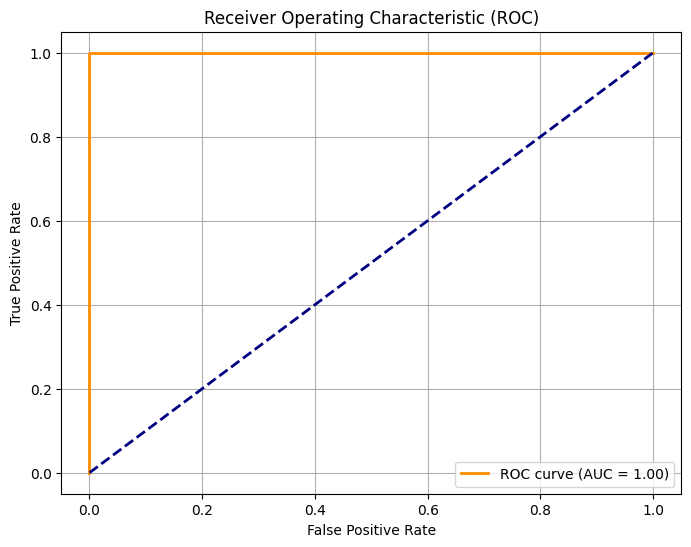

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Val

In [44]:
y_pred_val = model.predict(X_val_scaled)
y_proba_val = model.predict_proba(X_val)[:, 1]

In [45]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

Confusion Matrix:
[[ 94   0]
 [  0 820]]


In [46]:
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       820

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



ROC AUC: 1.00


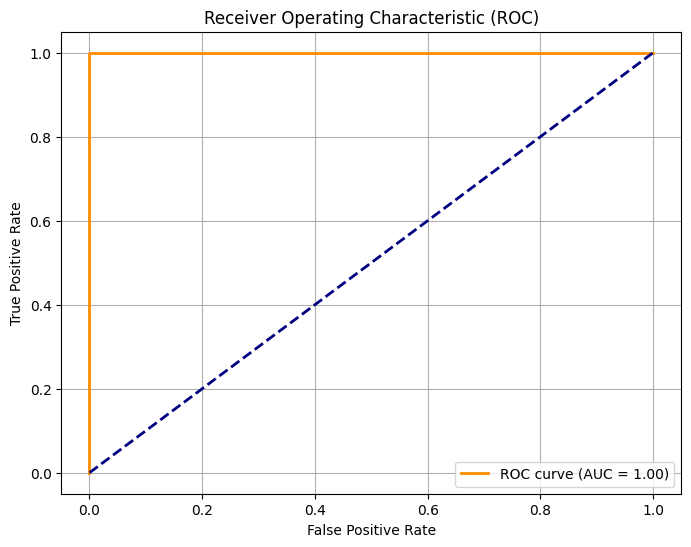

In [47]:
roc_auc_val = roc_auc_score(y_val, y_proba_val)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [48]:
import pandas as pd

row_ids = range(1, len(test_df) + 1)

submission_df = pd.DataFrame({
    'row_id': row_ids,
    'one_month_nill': y_pred_val
})

# Step 3: Save to CSV
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
